In [41]:
# Imports
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt 

In [42]:
# FEL
#path = "../FEL"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
                                                                      
# FEL - KeepAligned
#path = "../subsampled_fasta_keepAligned_Results"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]

# FEL on Subsampling_with_TN93-Algo , used BDNF alignment not p53
#path = "../../Test_TN93_algo_subsamples"
#files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL.json")]
#output_header = "BDNF_TN93Algo_FEL_AllBranches"

# FEL Internal on Subsampling_with_TN93-Algo, used BDNF alignment not p53
path = "../../Test_TN93_algo_subsamples"
files = [path+"/"+f.name for f in os.scandir(path) if f.name.endswith(".FEL_internal.json")]
output_header = "BDNF_TN93Algo_FEL_InternalBranches"

files

['../../Test_TN93_algo_subsamples/Test.aln_subsampled_168.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_218.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_34.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_156.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_96.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_226.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_185.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_45.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_119.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_127.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_74.fasta.FEL_internal.json',
 '../../Test_TN93_algo_subsamples/Test.aln_subsampled_128.fasta.FEL_internal.jso

In [43]:
data_dict = {}
pvalue_threshold = 0.1

def return_positive_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega > 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method

def return_negative_sites_count(MLE):
    global pvalue_threshold
    data_list = []
    count = 0
    for n, item in enumerate(MLE):
        if float(item[4] < pvalue_threshold): 
            #print(item)
            if float(item[0]) == 0.0:
                omega = 10000
            else:
                omega = float(item[1])/float(item[0])
            #end if
            
            if omega < 1.0:
                count += 1
                site = n + 1
                data_list.append(site)
            #end if
        #end if
    #end for
    return count, data_list
#end method


# Main -------------------------------------------------
count = 1
print("#, Filename, Num_Sequences, Num_Sites")
for filename in files:
    if os.stat(filename).st_size == 0: continue
    with open(filename, "r") as fh:
        json_data = json.load(fh)
    #end with
    num_seqs = json_data["input"]["number of sequences"]
    num_sites = json_data["input"]["number of sites"]
    print(count, filename.split("/")[-1], num_seqs, num_sites)
    
    positive_sites, positive_sites_list = return_positive_sites_count(json_data["MLE"]["content"]["0"])
    negative_sites, negative_sites_list = return_negative_sites_count(json_data["MLE"]["content"]["0"])
    
    
    # p-values
    p_values_list = []
    for item in json_data["MLE"]["content"]["0"]:
        p_value = item[4]
        p_values_list.append(p_value)
    #end for
    
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    #data_dict[filename.split("/")[-1]] = {"num_seqs": num_seqs, "negative_sites": negative_sites, "positive_sites" : positive_sites}
    data_dict[count] = {"Filename":filename.split("/")[-1],
                        "num_seqs": num_seqs, 
                        "num_sites" :num_sites,
                        "negative_sites": negative_sites, 
                        "positive_sites" : positive_sites,
                        "positive_sites_list" : positive_sites_list,
                        "negative_sites_list" : negative_sites_list,
                        "p_values":p_values_list}
            
    count += 1
#end for

#, Filename, Num_Sequences, Num_Sites
1 Test.aln_subsampled_168.fasta.FEL_internal.json 151 634
2 Test.aln_subsampled_218.fasta.FEL_internal.json 101 634
3 Test.aln_subsampled_34.fasta.FEL_internal.json 285 634
4 Test.aln_subsampled_156.fasta.FEL_internal.json 163 634
5 Test.aln_subsampled_96.fasta.FEL_internal.json 223 634
6 Test.aln_subsampled_226.fasta.FEL_internal.json 93 634
7 Test.aln_subsampled_185.fasta.FEL_internal.json 134 634
8 Test.aln_subsampled_45.fasta.FEL_internal.json 274 634
9 Test.aln_subsampled_119.fasta.FEL_internal.json 200 634
10 Test.aln_subsampled_127.fasta.FEL_internal.json 192 634
11 Test.aln_subsampled_74.fasta.FEL_internal.json 245 634
12 Test.aln_subsampled_128.fasta.FEL_internal.json 191 634
13 Test.aln_subsampled_116.fasta.FEL_internal.json 203 634
14 Test.aln_subsampled_159.fasta.FEL_internal.json 160 634
15 Test.aln_subsampled_229.fasta.FEL_internal.json 90 634
16 Test.aln_subsampled_99.fasta.FEL_internal.json 220 634
17 Test.aln_subsampled_167.fasta.F

144 Test.aln_subsampled_84.fasta.FEL_internal.json 235 634
145 Test.aln_subsampled_234.fasta.FEL_internal.json 85 634
146 Test.aln_subsampled_18.fasta.FEL_internal.json 301 634
147 Test.aln_subsampled_26.fasta.FEL_internal.json 293 634
148 Test.aln_subsampled_69.fasta.FEL_internal.json 250 634
149 Test.aln_subsampled_135.fasta.FEL_internal.json 184 634
150 Test.aln_subsampled_6.fasta.FEL_internal.json 313 634
151 Test.aln_subsampled_197.fasta.FEL_internal.json 122 634
152 Test.aln_subsampled_57.fasta.FEL_internal.json 262 634
153 Test.aln_subsampled_198.fasta.FEL_internal.json 121 634
154 Test.aln_subsampled_58.fasta.FEL_internal.json 261 634
155 Test.aln_subsampled_9.fasta.FEL_internal.json 310 634
156 Test.aln_subsampled_104.fasta.FEL_internal.json 215 634
157 Test.aln_subsampled_66.fasta.FEL_internal.json 253 634
158 Test.aln_subsampled_175.fasta.FEL_internal.json 144 634
159 Test.aln_subsampled_205.fasta.FEL_internal.json 114 634
160 Test.aln_subsampled_29.fasta.FEL_internal.json 2

In [44]:
df = pd.DataFrame.from_dict(data_dict, orient='index')
df

,Filename,num_seqs,num_sites,negative_sites,positive_sites,positive_sites_list,negative_sites_list,p_values
1,Test.aln_subsampled_168.fasta.FEL_internal.json,151,634,230,9,"[9, 11, 59, 83, 104, 106, 139, 222, 243]","[105, 121, 123, 125, 133, 153, 158, 184, 225, ...","[1, 1, 0.1187861787077399, 0.1635947877985107,..."
2,Test.aln_subsampled_218.fasta.FEL_internal.json,101,634,224,8,"[104, 106, 107, 118, 120, 139, 154, 188]","[53, 105, 116, 133, 167, 225, 233, 234, 238, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0.8993894344248524..."
3,Test.aln_subsampled_34.fasta.FEL_internal.json,285,634,239,8,"[11, 59, 83, 106, 139, 150, 222, 243]","[53, 55, 99, 117, 138, 151, 153, 158, 192, 202...","[1, 1, 0.1927646535292398, 0.14099699233666, 0..."
4,Test.aln_subsampled_156.fasta.FEL_internal.json,163,634,230,12,"[8, 11, 59, 83, 106, 139, 154, 168, 181, 201, ...","[117, 123, 129, 151, 153, 158, 225, 226, 233, ...","[1, 1, 0.1345928855725192, 0.1614365443303988,..."
5,Test.aln_subsampled_96.fasta.FEL_internal.json,223,634,231,14,"[8, 11, 59, 73, 79, 83, 139, 150, 154, 181, 18...","[138, 151, 153, 158, 225, 226, 233, 234, 238, ...","[1, 1, 0.1595901972341714, 0.2017213353673285,..."
...,...,...,...,...,...,...,...,...
234,Test.aln_subsampled_21.fasta.FEL_internal.json,298,634,241,8,"[11, 59, 83, 139, 150, 181, 222, 243]","[53, 55, 99, 117, 138, 151, 153, 158, 192, 202...","[1, 1, 0.1920643399850754, 0.141009973048815, ..."
235,Test.aln_subsampled_132.fasta.FEL_internal.json,187,634,228,11,"[11, 59, 83, 106, 139, 154, 181, 186, 201, 222...","[53, 119, 151, 153, 158, 225, 226, 233, 234, 2...","[1, 1, 0.1445206216298315, 0.2073692272279077,..."
236,Test.aln_subsampled_1.fasta.FEL_internal.json,318,634,242,8,"[8, 59, 128, 139, 181, 186, 222, 243]","[2, 55, 99, 123, 138, 151, 153, 158, 192, 202,...","[1, 0.02797719930780052, 0.4832763968792168, 0..."
237,Test.aln_subsampled_50.fasta.FEL_internal.json,269,634,236,9,"[11, 59, 83, 106, 139, 154, 181, 222, 243]","[53, 55, 99, 117, 138, 151, 153, 158, 202, 225...","[1, 1, 0.1788737477610444, 0.2379922777274046,..."


In [45]:
df.sort_values(by=['num_seqs'], ascending=False, inplace=True)
df

,Filename,num_seqs,num_sites,negative_sites,positive_sites,positive_sites_list,negative_sites_list,p_values
236,Test.aln_subsampled_1.fasta.FEL_internal.json,318,634,242,8,"[8, 59, 128, 139, 181, 186, 222, 243]","[2, 55, 99, 123, 138, 151, 153, 158, 192, 202,...","[1, 0.02797719930780052, 0.4832763968792168, 0..."
130,Test.aln_subsampled_2.fasta.FEL_internal.json,317,634,240,10,"[8, 59, 128, 139, 150, 155, 181, 186, 222, 243]","[2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...","[1, 0.02751939316612817, 0.4860897284766054, 0..."
52,Test.aln_subsampled_3.fasta.FEL_internal.json,316,634,240,10,"[8, 59, 128, 139, 150, 155, 181, 186, 222, 243]","[2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...","[1, 0.02752302530985373, 0.4861061974443857, 0..."
96,Test.aln_subsampled_4.fasta.FEL_internal.json,315,634,240,9,"[8, 59, 128, 139, 150, 181, 186, 222, 243]","[2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...","[1, 0.02785552456720664, 0.4906744258127314, 0..."
203,Test.aln_subsampled_5.fasta.FEL_internal.json,314,634,240,9,"[8, 59, 128, 139, 150, 181, 186, 222, 243]","[2, 55, 99, 123, 138, 151, 153, 158, 202, 225,...","[1, 0.02786885054464616, 0.4908084719691523, 0..."
...,...,...,...,...,...,...,...,...
145,Test.aln_subsampled_234.fasta.FEL_internal.json,85,634,222,7,"[104, 106, 107, 118, 120, 139, 154]","[53, 105, 110, 117, 123, 167, 225, 233, 234, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9191301659635502..."
35,Test.aln_subsampled_235.fasta.FEL_internal.json,84,634,221,7,"[104, 106, 107, 118, 120, 139, 154]","[53, 105, 117, 123, 167, 225, 233, 234, 238, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9093728348609784..."
100,Test.aln_subsampled_236.fasta.FEL_internal.json,83,634,220,7,"[104, 106, 107, 118, 120, 139, 154]","[53, 105, 110, 117, 123, 167, 225, 233, 234, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9259760588855657..."
199,Test.aln_subsampled_237.fasta.FEL_internal.json,82,634,219,8,"[104, 106, 107, 118, 120, 139, 154, 222]","[53, 105, 110, 117, 123, 167, 225, 233, 234, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0.9350475030316959..."


In [46]:
def plot_df(df, y, tag):
    global output_header
    plt.figure()
    df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y=y, color="skyblue", x="num_seqs", markerfacecolor='black', marker='o', markersize=6, rot=90, figsize=(12,12))
    plt.xticks(fontsize=20 )
    plt.yticks(fontsize=20 )
    plt.xlabel('Number of Sequences',  fontsize=24)
    plt.ylabel('Number of Sites', fontsize=24)
    plt.savefig("../../Plots/" + output_header + tag)
    plt.show()
#end method


<Figure size 432x288 with 0 Axes>

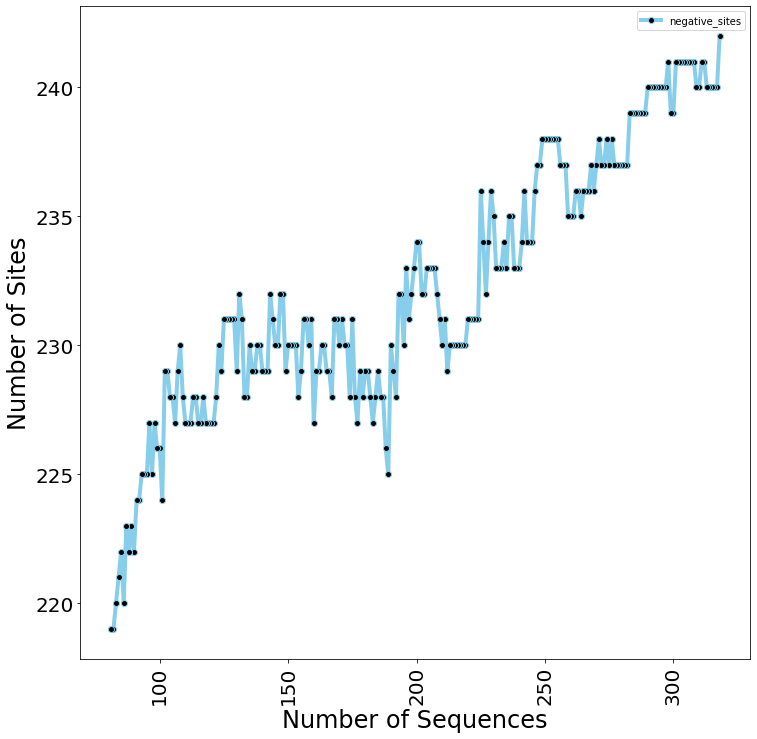

In [47]:
# df.sort_values(by=['num_seqs'], ascending=False).plot(kind="line", lw=4, y="negative_sites", x="num_seqs", markerfacecolor='black', marker='.', markersize=12, rot=90, figsize=(12,12))
plot_df(df, "negative_sites", "_NegativeSites.png")

<Figure size 432x288 with 0 Axes>

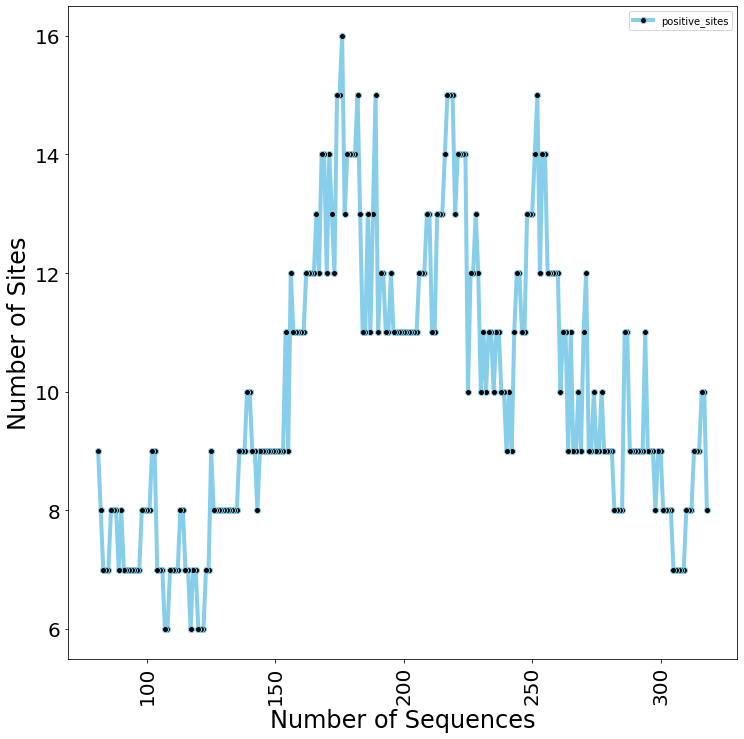

In [48]:
plot_df(df, "positive_sites", "_PositiveSites.png")